## Install the requirements

In [1]:
!wget --show-progress 'https://d3js.org/d3.v3.js'
!pip install --upgrade jinja2==3.0.3
from IPython.core.display import HTML
HTML('<script src="d3.v3.js"></script>')

--2025-04-03 09:47:02--  https://d3js.org/d3.v3.js
Resolving d3js.org (d3js.org)... 172.67.73.126, 104.26.6.30, 104.26.7.30, ...
Connecting to d3js.org (d3js.org)|172.67.73.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/javascript]
Saving to: ‘d3.v3.js’

d3.v3.js                [ <=>                ] 330.02K  --.-KB/s    in 0.1s    

2025-04-03 09:47:02 (3.37 MB/s) - ‘d3.v3.js’ saved [337945]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 2.7 MB/s eta 0:00:0000:01
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.3
    Uninstalling Jinja2-3.1.3:
      Successfully uninstalled Jinja2-3.1.3


In [2]:
!pip install lxml
!pip install python-igraph
!pip install cairocffi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 49.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.1 MB/s eta 0:00:00


## If necessary, restart kernel now

In [3]:
import os
#download graphframes package
!wget -q --show-progress http://repos.spark-packages.org/graphframes/graphframes/0.8.1-spark2.4-s_2.12/:graphframes-0.8.1-spark2.4-s_2.12.jar -P /home/jovyan/
#tell to load graphframes and dependencies to the spark cluster for use
os.environ["PYSPARK_SUBMIT_ARGS"] = '--repositories "http://repos.spark-packages.org" --packages graphframes:graphframes:0.8.1-spark2.4-s_2.12 --jars /home/jovyan/.ivy2/jars/com.typesafe.scala-logging_scala-logging-api_2.12-2.1.2.jar,/home/jovyan/.ivy2/jars/org.scala-lang_scala-reflect-2.12.0.jar,/home/jovyan/.ivy2/jars/com.typesafe.scala-logging_scala-logging-slf4j_2.12-2.1.2.jar,/home/jovyan/.ivy2/jars/org.slf4j_slf4j-api-1.7.7.jar,/home/jovyan/.ivy2/jars/graphframes_graphframes-0.8.1-spark2.4-s_2.12.jar pyspark-shell'

In [4]:
import pyspark
from pyspark.sql import *
try:
    sc = pyspark.SparkContext('local[*]',environment = {})
except:
    sc = sc
#create sqlcontext on the spark, enables the use of the SQL queries below
#sqlContext = SQLContext(sc)
sqlContext = pyspark.sql.SparkSession(sc)


## Do not mind the warning about deprecation 

### Below is a tiny example on how to create a graph

In [ ]:
import igraph as ig
import matplotlib.pyplot as plt
# Create a Vertex DataFrame with unique ID column "id"
#edges=([(from0,to0),(from1,to1),(to1,from0)]), etc... first is zero, rest is done in g.vs["name"] order
edges=([(0, 1), (0, 2)])
g = ig.Graph(3,edges,directed=True)
g.vs["name"] = ["A", "B", "D"]
g.es["weights"]=[1,3.14]
display(g)

fig, ax = plt.subplots(figsize=(5,5))
ig.plot(g,target=ax,layout="circle",vertex_size=30,vertex_color="white",vertex_frame_width=1.0, vertex_frame_color="black",vertex_label=g.vs["name"],vertex_label_size=10.0,edge_width=1,edge_arrow_size=15, edge_label=g.es["weights"])
plt.show()


### Task 4.2.1 (3 p)

Modify the code below using the above example to form the graph that is shown in the Mining Massive Datasets book in figure 5.1 (figure below). Additionally, give random numbers to the edges (add random numbers in g.es["weights"]).  

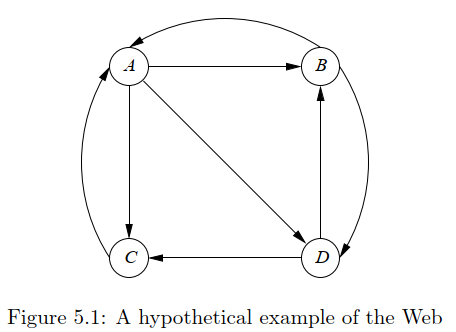

In [ ]:
# Create a GraphFrame
import igraph as ig
import matplotlib.pyplot as plt
#edges=([(from0,to1),(from1,to3),(to3,from4)...])
edges=([(0, 1),...])
g = ig.Graph(4,edges,directed=True)
g.vs["name"] = ["A",...]
g.es["weights"]=[0.47,] #Note: length of the "g.es" should be the same as length of "edges"
display(g)

fig, ax = plt.subplots(figsize=(5,5))
ig.plot(g,target=ax,layout="circle",vertex_size=30,vertex_color="white",vertex_frame_width=1.0, vertex_frame_color="black",vertex_label=g.vs["name"],vertex_label_size=10.0,edge_width=1,edge_arrow_size=15, edge_label=g.es["weights"])
plt.show()


Below is the code for applying the pagerank algorithm to the graph. What the pagerank algorithm computes?

Calculate PageRank for the matrix in figure 5.3 of the course book change damping from 0.85, to 0.5 and 0.9. Explain what the 'damping' parameter does? How did the pageRank change in this case?

In [ ]:
# Run PageRank algorithm, and show results.
results=ig.Graph.pagerank(g, implementation='power', directed=True, damping=0.85)
print(results)

### Task 4.2.2 (4 p)

In the code below, the Moodle zip-package data is used. 
Describe the data, what information do the files contain (you can have a look at the readme-Ego.txt file available on the web page https://snap.stanford.edu/data/egonets-Facebook.html )?
We do not use the feature files in this exercise.

What is the degree of a node?   

Is the PageRank algorithm any better than just the degree of a node to find the most important vertices of the network? Give some examples which user ids you think are important by visual inspection (see image), and in pagerank or degree. (For some analyses a vertex can be important if it connects network parts that would be isolated without the connecting vertex.)

66
540
[0.004487921923939519, 0.0057499210038887, 0.0037048036631419953, 0.004623449286823166, 0.0016720765027717645, 0.0008053691275180309, 0.006277732125535889, 0.0048124855945266025, 0.005781745862581488, 0.00467821694040376, 0.00536745386034648, 0.0057876505832815195, 0.003592232241906875, 0.004678216940402426, 0.004739284660697229, 0.0067794672138418235, 0.007340304800119276, 0.00467821694040098, 0.0033175083812565917, 0.007474031543113972, 0.006779467213843214, 0.006689835111174023, 0.006483197761824865, 0.006833417484908045, 0.005835715018580414, 0.0038236574999233218, 0.004971971129013624, 0.006911697771533001, 0.005835715018577381, 0.008056330923175151, 0.0008053691275180309, 0.005974057177077773, 0.005367453860345792, 0.006363281256286476, 0.004820719731696256, 0.009056580002896839, 0.003318518540416056, 0.004881685553549504, 0.005727614637276211, 0.0035910080943332076, 0.006645306340729748, 0.00396079604008498, 0.0008053691275180309, 0.0030776807877570837, 0.0012500418197428

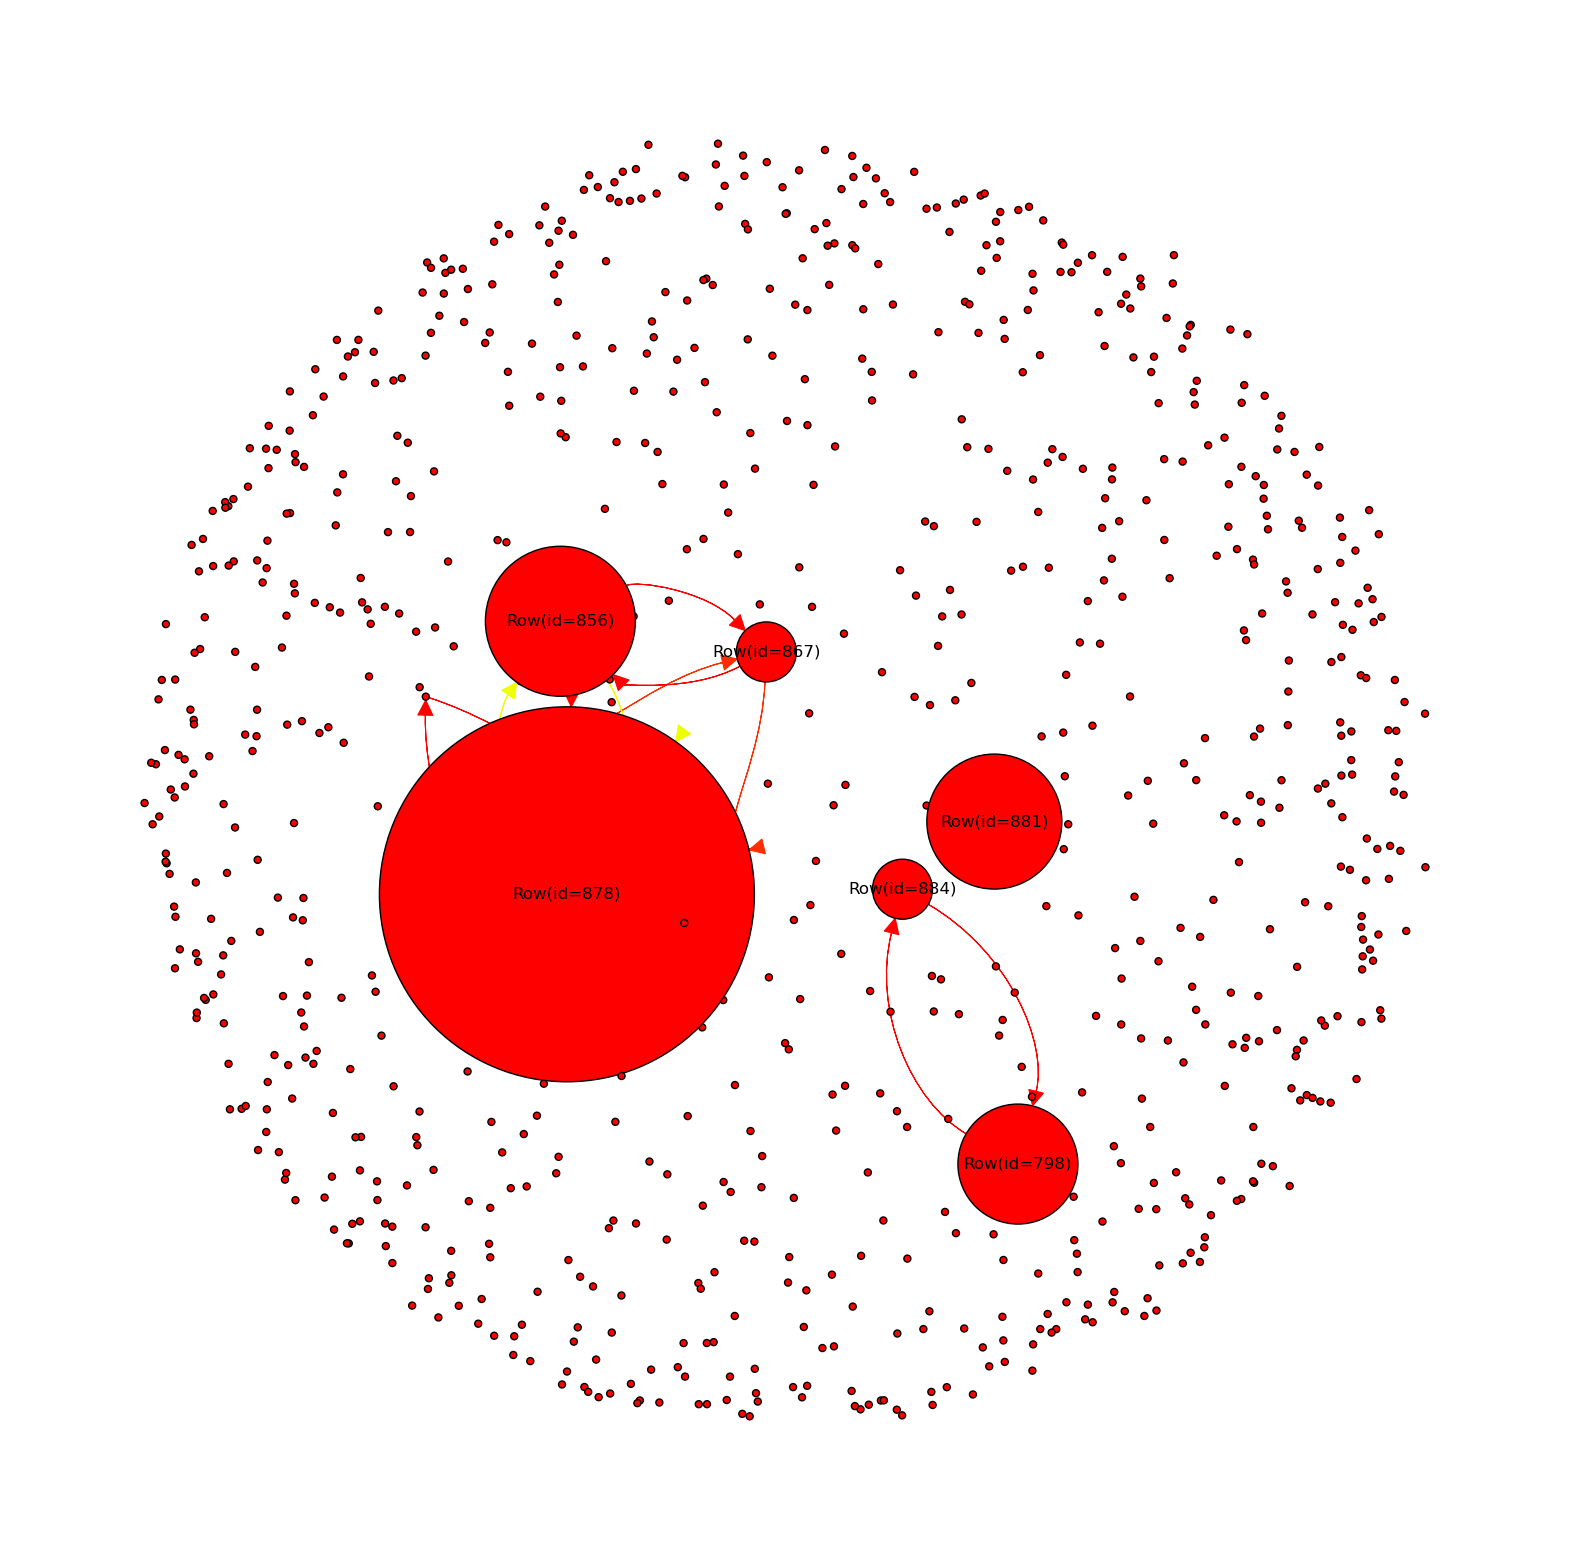

In [54]:
import igraph as ig
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import pyspark.sql.functions as F
from pyspark.sql.window import Window as W
import numpy as np
#read graph edges(or arcs, lines) (multiple edges per vertex can exist)
lines = sc.textFile("698.edges")
edges = lines.map(lambda l: l.split(" ")). \
            map(lambda p: Row( src=int(p[0]), dst=int(p[1])) )
edges = sqlContext.createDataFrame(edges)

#read graph vertices(or nodes, points) (these are unique)
lines = sc.textFile("698.feat")
vertices = lines.map(lambda l: l.split(" ")). \
            map(lambda p: Row(id=int(p[0]), name="userid_"+p[0]) )
vertices = sqlContext.createDataFrame(vertices)    

idx_array = vertices.select("id").rdd.flatMap(lambda x: x).collect()
#print(idx_array)

#edges.show()
#vertices.show()
len_vertices=vertices.count()
print(len_vertices)
print(edges.count())


list_edges=[]
for i in edges.collect(): 
   list_edges.append(tuple(i)) 
#print(list_edges)
#print(len(list_edges))
#print(len_vertices)

#g = ig.Graph.DataFrame(edges, directed=True)
g = ig.Graph(len_vertices,edges=list_edges,directed=True) #,vertex_name_attr='id');
g.vs["name"] = list(vertices.select("name").collect())
g.vs["id"] = list(vertices.select("id").collect())
degrees=g.degree()
degree_list=[]

for i in idx_array:
    degree_list.append(degrees[i])
#print(degree_list)
names = g.vs["name"]


pagerank=g.pagerank(vertices=idx_array,directed=True, damping=0.85)  #showing only pagerank to starting indices
print(pagerank)

a = vertices.persist()
#result = result.drop("id")

b = sqlContext.createDataFrame([(l,) for l in pagerank], ['pagerank'])
c = sqlContext.createDataFrame([(l,) for l in degree_list], ['degree'])
a = a.withColumn("idx2", F.monotonically_increasing_id())
b = b.withColumn("idx", F.monotonically_increasing_id())
c = c.withColumn("idx", F.monotonically_increasing_id())

windowSpec = W.orderBy("idx")
windowSpec2 = W.orderBy("idx2")
a = a.withColumn("idx2", F.row_number().over(windowSpec2))
b = b.withColumn("idx", F.row_number().over(windowSpec))
c = c.withColumn("idx", F.row_number().over(windowSpec))

d = a.join(b, a.idx2 == b.idx).drop("idx2")
d.show()

result=d.join(c,d.idx == c.idx).drop("idx")
result.orderBy(result.pagerank.desc())
result.show()


### NOTE: Image below does not scale to degree, but rather than sum of egdes...

#g = ig.Graph.DataFrame(edges, directed=True)
g = ig.Graph(len_vertices,edges=list_edges,directed=True) #,vertex_name_attr='id'); 
g.vs["name"] = list(vertices.select("name").collect())
g.vs["id"] = list(vertices.select("id").collect())
communities = g.community_edge_betweenness()
communities = communities.as_clustering()
num_communities = len(communities)

layout = g.layout_kamada_kawai()
g.vs["x"], g.vs["y"] = list(zip(*layout))
g.vs["size"] = 15
g.es["size"] = 15

cluster_graph = communities.cluster_graph(
    combine_vertices={
        "x": "mean",
        "y": "mean",
        "color": "first",
        "size": "sum",
    },
    combine_edges={
        "size": "sum",
    },
)
palette1 = ig.RainbowPalette(n=num_communities)
#select the circle radius based on the sum of edges connecting to it
g.es["color"] = [palette1.get(int(i)) for i in ig.rescale(cluster_graph.es["size"], (0, 150), clamp=True)]

for i in range(0,len(cluster_graph.vs["size"])):
    if cluster_graph.vs["size"][i]<20:
         g.vs[i]["id"]=None
         # set a minimum size on vertex_size, otherwise vertices are too small
         cluster_graph.vs[i]["size"]=7     
#Igraph node significance vs others
fig2, ax2 = plt.subplots(figsize=(20,20))
ig.plot(
    cluster_graph,
    target=ax2,
    palette=palette1,

    #vertex_size=[max(7, size) for size in cluster_graph.vs["size"]],
    vertex_size=cluster_graph.vs["size"],
    vertex_label=g.vs["id"],
    edge_color=g.es["color"],
    edge_width=0.8,
)


plt.show()



### Task 4.2.3 (4 p)

A graph can be split into clusters by the connectivity, contents or with both connectivity and contents of the graph. In social network graphs individuals may belong to many groups or communities so the clustering is not strictly defined for this kind of data. 
A graph can be partitioned in many ways and the graph partition problem is NP hard to find the best partition. A big computation cluster seems to be the only way to find good solution for large graphs quickly. As seen in the course book chapter Mining Social-Network Graphs, there are many different graph clustering/partitioning/grouping algorithms available. 
In the following code, Label Propagation Algorithm is used to cluster communities. The code uses the data files from the last example. 

Run the code. Examine the resulting graph. How many clusters the LPA algorihtm generated?

In [ ]:
#res.show()

In [ ]:
#%matplotlib notebook

import networkx as nx
import matplotlib.pyplot as plt
import numpy as nb
import igraph as ig

#readn graph edges(or arcs, lines) (multiple edges per vertex can exist)
lines = sc.textFile("698.edges")
edges = lines.map(lambda l: l.split(" ")). \
            map(lambda p: Row( src=int(p[0]), dst=int(p[1])) )
edges = sqlContext.createDataFrame(edges)

#read graph vertices(or nodes, points) (these are unique)
lines = sc.textFile("698.feat")
vertices = lines.map(lambda l: l.split(" ")). \
            map(lambda p: Row(id=int(p[0]), name="userid_"+p[0] ,features=[int(x) for x in p[1:]] ))
vertices = sqlContext.createDataFrame(vertices)    

from graphframes import *
g = GraphFrame(vertices, edges)
#calculate simple clustering with the label propagation clustering alg.
lpa = g.labelPropagation(maxIter=5)
nodes = lpa.select("id","label")
lpa.show()
nodes.show()
fig, ax = plt.subplots(figsize=(15,15))
from igraph import *
ig = Graph.TupleList(g.edges.collect(), directed=True)
plot(ig)

#plotting, generate unique colors for each group -----------------------
G = nx.DiGraph()
for x in g.edges.collect():
    G.add_edges_from([(x[0],x[1])], weight=1)
for x in lpa.select("id","label").rdd.map(lambda r: ( int(r[0]),int(r[1])) ).collect():
    G.add_node(x[0],label=x[1])
grouplabels = [list(x[1].values())[0] for x in G.nodes(True)]
node_texts = {node:node for node in G.nodes()};
cmap = plt.get_cmap('gist_rainbow')
uniqlabels = nb.unique(grouplabels)
randvals = nb.random.random_sample((len(uniqlabels),1))
colorlut = dict(zip(uniqlabels,randvals))  
gcolors = []
for x in grouplabels:
    gcolors.append(cmap(float(colorlut[x])))
positions=nx.spring_layout(G,k=0.1,scale=1.5,iterations=20)
nx.draw_networkx(G,positions, labels=node_texts, node_color = gcolors, node_size=500,arrows=False)
#plotting end ----------------------------------------------------------

